## Visualização de Dados Financeiros

O mercado financeiro é um grande campo de atuação da Ciência de Dados, sendo possível ser realizada a previsão do preço de ações, clusterização de empresas similares, análise de sentimentos de textos, entre outros trabalhos utilizando algoritmos supervisionados e não supervisionados.

Neste notebook, serão importadas e exibidas em séries temporais as ações de 5 empresas brasileiras e também o [Índice Bovespa (Ibovespa B3)](https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm) utilizando como fonte o [Yahoo Finanças](https://br.financas.yahoo.com).

### 1. Importando as bibliotecas e criando o dataset

Nessa primeira etapa, importaremos as bibliotecas python bastante utilizadas na análise de dados. O pandas, para a manipulação; numpy, para cálculos matemáticos; matplotlib, seaborn e plotly para a visualização; e, por fim, o datareader, para trazer os dados das ações da web.
- [*pandas*](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.
- [*NumPy*](https://numpy.org) is the fundamental package for scientific computing in Python.
- [*Matplotlib*](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- [*Seaborn*](https://seaborn.pydata.org) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- [*Plotly*](https://plotly.com/python/) is a Python graphing library makes interactive, publication-quality graphs.

In [1]:
!pip install pandas

In [2]:
!pip install pandas_datareader 

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!pip install plotly

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
from pandas_datareader import data as pdr

In [9]:
import matplotlib.pyplot as mpl

In [10]:
import seaborn as sb

In [11]:
import plotly.express as px

In [12]:
print(f'{pd.__name__} {pd.__version__}')

pandas 1.4.2


In [13]:
print(f'{np.__name__} {np.__version__}')

numpy 1.22.3


In [14]:
%matplotlib inline

In [15]:
# Activate seaborn’s “default” theme.
sb.set_theme()

Nosso objetivo é coletar os dados das ações de algumas empresas. Para isso, utilizaremos o datareader, já importado anteriormente, e também o Yahoo! Finanças como nossa fonte web.

#### Carregando dados do Yahoo Finanças 

Carregando os dados da empresa Magazine Luiza S.A. (MGLU3.SA).

In [16]:
START = '1994-07-01'

In [17]:
vale_df = pdr.DataReader(name='MGLU3.SA', data_source='yahoo', start=START)

In [18]:
vale_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-05-02,0.518750,0.503125,0.503125,0.514062,280003200.0,0.463173
2011-05-03,0.521562,0.506250,0.515625,0.509375,33670400.0,0.458950
2011-05-04,0.515000,0.510000,0.510000,0.515000,39203200.0,0.464018
2011-05-05,0.512812,0.510000,0.512812,0.511875,35097600.0,0.461202
2011-05-06,0.511875,0.500000,0.510937,0.508125,38672000.0,0.457824


In [19]:
vale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2724 entries, 2011-05-02 to 2022-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2724 non-null   float64
 1   Low        2724 non-null   float64
 2   Open       2724 non-null   float64
 3   Close      2724 non-null   float64
 4   Volume     2724 non-null   float64
 5   Adj Close  2724 non-null   float64
dtypes: float64(6)
memory usage: 149.0 KB


Carregando dados de uma carteira de ações de forma automática.

Precisamos definir as ações de quais empresas desejamos importar, colocando seus nomes em uma lista. Esses nomes podem ser encontrados no Yahoo Finanças, ao selecionar a empresa é importante atendar ao qual bolsa ela é comercializada, visto que uma mesma empresa pode ter suas ações comercializadas em mercados de vários países, nesse teste analisaremos as ações comercializadas na *B3* a bolsa de valores brasileira. As empresas selecionadas foram:
- Americanas S.A. (AMER3.SA)
- Banco Bradesco S.A. (BBDC4.SA)
- Braskem S.A. (BRKM5.SA)
- BR Malls Participações S.A. (BRML3.SA)
- Companhia Siderúrgica Nacional (CSNA3.SA)
- JHSF Participações S.A. (JHSF3.SA)
- Marfrig Global Foods S.A. (MRFG3.SA)
- Companhia Brasileira de Distribuição (PCAR3.SA)
- SLC Agrícola S.A. (SLCE3.SA)
- Vale S.A. (VALE3.SA)
- iShares Ibovespa Index Fund (BOVA11.SA)

In [72]:
carteira = ['AMER3.SA', 'BBDC4.SA', 'BRKM5.SA', 'BRML3.SA', 'CSNA3.SA', 'JHSF3.SA',
            'MRFG3.SA', 'PCAR3.SA', 'SLCE3.SA', 'VALE3.SA', 'BOVA11.SA']

Definidas as ações que queremos analisar, vamos criar um dataframe vazio e utilizando um laço de repetição _for_ percorrermos as ações da nossa carteira, coletando as cotações do Yahoo Finanças e armazenando no dataframe.

In [77]:
carteira_df = pd.DataFrame()

In [78]:
for acao in carteira:
    carteira_df[acao] = pdr.DataReader(name=acao, data_source='yahoo', start=START)['Close']

Repare que dentro da função do datareader, passamos o nome da ação, a fonte, a data de início e, fora dos parênteses, frisamos se tratar de dados do fechamento diário da bolsa. Vamos visualizar como ficou nosso dataset.

In [79]:
carteira_df

,AMER3.SA,BBDC4.SA,BRKM5.SA,BRML3.SA,CSNA3.SA,JHSF3.SA,MRFG3.SA,PCAR3.SA,SLCE3.SA,VALE3.SA,BOVA11.SA
Date,,,,,,,,,,,
2005-03-30,19.093649,NaN,26.562500,NaN,10.300000,NaN,NaN,60.117096,NaN,20.677500,NaN
2005-03-31,19.093649,NaN,27.072500,NaN,10.550000,NaN,NaN,60.117096,NaN,21.250000,NaN
2005-04-01,18.546097,NaN,27.850000,NaN,10.741666,NaN,NaN,60.117096,NaN,21.125000,NaN
2005-04-04,17.450994,NaN,27.247499,NaN,10.516666,NaN,NaN,60.117096,NaN,20.525000,NaN
2005-04-05,17.194881,NaN,26.500000,NaN,10.116666,NaN,NaN,60.117096,NaN,20.299999,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,28.150000,19.481817,43.630001,8.72,25.440001,6.18,19.760000,23.860001,48.119999,92.089996,111.650002
2022-04-18,28.360001,19.827272,43.849998,8.75,24.750000,6.28,19.280001,23.780001,49.919998,90.570000,111.459999
2022-04-19,28.010000,19.570000,43.799999,9.42,24.860001,6.67,19.360001,23.760000,50.040001,87.680000,110.919998


In [39]:
carteira_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4242 entries, 2005-03-30 to 2022-04-22
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AMER3.SA   4242 non-null   float64
 1   BBDC4.SA   3548 non-null   float64
 2   BRKM5.SA   4242 non-null   float64
 3   BRML3.SA   3729 non-null   float64
 4   CSNA3.SA   4232 non-null   float64
 5   JHSF3.SA   3725 non-null   float64
 6   MRFG3.SA   3671 non-null   float64
 7   PCAR3.SA   4242 non-null   float64
 8   SLCE3.SA   3681 non-null   float64
 9   VALE3.SA   4242 non-null   float64
 10  BOVA11.SA  3320 non-null   float64
dtypes: float64(11)
memory usage: 397.7 KB


In [80]:
carteira_df.columns

Index(['AMER3.SA', 'BBDC4.SA', 'BRKM5.SA', 'BRML3.SA', 'CSNA3.SA', 'JHSF3.SA',
       'MRFG3.SA', 'PCAR3.SA', 'SLCE3.SA', 'VALE3.SA', 'BOVA11.SA'],
      dtype='object')

Para facilitar a utilização desses dados, podemos renomear as colunas, fazendo com que fiquem mais intuitivo para quem está lendo.

In [82]:
carteira_df = carteira_df.rename(columns={'AMER3.SA':'AMER3', 'BBDC4.SA':'BBDC4', 'BRKM5.SA':'BRKM5',
                                          'BRML3.SA':'BRML3', 'CSNA3.SA':'CSNA3', 'JHSF3.SA':'JHSF3',
                                          'MRFG3.SA':'MRFG3', 'PCAR3.SA':'PCAR3', 'SLCE3.SA':'SLCE3',
                                          'VALE3.SA':'VALE3', 'BOVA11.SA':'BOVA11'})

In [83]:
carteira_df.columns

Index(['AMER3', 'BBDC4', 'BRKM5', 'BRML3', 'CSNA3', 'JHSF3', 'MRFG3', 'PCAR3',
       'SLCE3', 'VALE3', 'BOVA11'],
      dtype='object')

In [84]:
carteira_df.tail()

,AMER3,BBDC4,BRKM5,BRML3,CSNA3,JHSF3,MRFG3,PCAR3,SLCE3,VALE3,BOVA11
Date,,,,,,,,,,,
2022-04-14,28.150000,19.481817,43.630001,8.72,25.440001,6.18,19.760000,23.860001,48.119999,92.089996,111.650002
2022-04-18,28.360001,19.827272,43.849998,8.75,24.750000,6.28,19.280001,23.780001,49.919998,90.570000,111.459999
2022-04-19,28.010000,19.570000,43.799999,9.42,24.860001,6.67,19.360001,23.760000,50.040001,87.680000,110.919998
2022-04-20,27.240000,19.500000,41.389999,9.55,23.840000,6.62,19.250000,23.420000,50.720001,85.400002,110.050003
2022-04-22,26.670000,19.219999,40.299999,9.29,22.010000,6.39,18.750000,22.309999,50.060001,80.449997,106.750000


In [85]:
carteira_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4242 entries, 2005-03-30 to 2022-04-22
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMER3   4242 non-null   float64
 1   BBDC4   3548 non-null   float64
 2   BRKM5   4242 non-null   float64
 3   BRML3   3729 non-null   float64
 4   CSNA3   4232 non-null   float64
 5   JHSF3   3725 non-null   float64
 6   MRFG3   3671 non-null   float64
 7   PCAR3   4242 non-null   float64
 8   SLCE3   3681 non-null   float64
 9   VALE3   4242 non-null   float64
 10  BOVA11  3320 non-null   float64
dtypes: float64(11)
memory usage: 397.7 KB


### Visualizando os dados

Com os dados coletados, uma forma mais interessante de visualizá-los é utilizando gráficos. Para os dados de ações, é possível fazer vários tipos de análises, mas aqui focaremos nas séries temporais para visualizar como as ações se comportam ao longo do tempo.

Verificando valores nulos

In [86]:
carteira_df.isnull().sum()

AMER3       0
BBDC4     694
BRKM5       0
BRML3     513
CSNA3      10
JHSF3     517
MRFG3     571
PCAR3       0
SLCE3     561
VALE3       0
BOVA11    922
dtype: int64

In [87]:
# Keep the DataFrame with valid entries in the same variable.
carteira_normalizada = carteira_df.dropna()

In [88]:
carteira_normalizada.head()

,AMER3,BBDC4,BRKM5,BRML3,CSNA3,JHSF3,MRFG3,PCAR3,SLCE3,VALE3,BOVA11
Date,,,,,,,,,,,
2008-11-28,21.204370,15.357157,6.26,3.160535,12.945,1.65,8.60,33.970104,5.131818,27.530001,36.595901
2008-12-01,20.912931,14.633881,6.13,3.000000,12.050,1.50,7.89,33.970104,4.772727,25.500000,34.744900
2008-12-02,20.135763,15.082811,6.16,2.923076,12.090,1.50,7.70,33.970104,4.545454,24.549999,35.001598
2008-12-03,18.811041,15.207514,5.93,2.876254,11.820,1.43,6.90,33.970104,4.418181,24.870001,35.293800
2008-12-04,18.139849,14.951873,5.87,2.943143,12.000,1.40,7.41,33.970104,4.613636,24.090000,35.122101


In [89]:
carteira_normalizada

,AMER3,BBDC4,BRKM5,BRML3,CSNA3,JHSF3,MRFG3,PCAR3,SLCE3,VALE3,BOVA11
Date,,,,,,,,,,,
2008-11-28,21.204370,15.357157,6.260000,3.160535,12.945000,1.65,8.600000,33.970104,5.131818,27.530001,36.595901
2008-12-01,20.912931,14.633881,6.130000,3.000000,12.050000,1.50,7.890000,33.970104,4.772727,25.500000,34.744900
2008-12-02,20.135763,15.082811,6.160000,2.923076,12.090000,1.50,7.700000,33.970104,4.545454,24.549999,35.001598
2008-12-03,18.811041,15.207514,5.930000,2.876254,11.820000,1.43,6.900000,33.970104,4.418181,24.870001,35.293800
2008-12-04,18.139849,14.951873,5.870000,2.943143,12.000000,1.40,7.410000,33.970104,4.613636,24.090000,35.122101
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,28.150000,19.481817,43.630001,8.720000,25.440001,6.18,19.760000,23.860001,48.119999,92.089996,111.650002
2022-04-18,28.360001,19.827272,43.849998,8.750000,24.750000,6.28,19.280001,23.780001,49.919998,90.570000,111.459999
2022-04-19,28.010000,19.570000,43.799999,9.420000,24.860001,6.67,19.360001,23.760000,50.040001,87.680000,110.919998


In [90]:
carteira_normalizada.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3320 entries, 2008-11-28 to 2022-04-22
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMER3   3320 non-null   float64
 1   BBDC4   3320 non-null   float64
 2   BRKM5   3320 non-null   float64
 3   BRML3   3320 non-null   float64
 4   CSNA3   3320 non-null   float64
 5   JHSF3   3320 non-null   float64
 6   MRFG3   3320 non-null   float64
 7   PCAR3   3320 non-null   float64
 8   SLCE3   3320 non-null   float64
 9   VALE3   3320 non-null   float64
 10  BOVA11  3320 non-null   float64
dtypes: float64(11)
memory usage: 311.2 KB


In [98]:
# Summary statistics of the Series or Dataframe provided.
carteira_normalizada.describe()

,AMER3,BBDC4,BRKM5,BRML3,CSNA3,JHSF3,MRFG3,PCAR3,SLCE3,VALE3,BOVA11
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,29.591165,15.652709,25.803151,11.247038,15.760288,3.926446,10.376343,63.923175,14.043114,44.127681,69.276878
std,22.215318,4.986824,14.903705,3.160243,9.750563,2.227076,5.431927,25.257670,10.747463,21.305396,21.707780
min,4.512031,8.001417,4.410000,2.809364,2.740000,1.030000,3.600000,7.282530,4.418181,8.600000,34.744900
25%,13.670113,11.397348,14.320000,9.320000,8.800000,1.900000,6.277500,41.700000,7.454545,30.947501,52.907500
50%,23.803336,13.951129,20.500000,11.230384,12.090000,3.460000,7.940000,74.989998,8.795454,41.465000,62.545000
75%,35.045857,18.913222,34.112500,13.000000,21.715001,5.770000,14.350000,74.989998,18.292045,51.982500,82.562502
max,126.000000,29.609316,70.169998,19.665550,51.770000,10.510000,27.700001,130.000000,53.590000,118.720001,125.750000


Para isso, é necessário transformar a coluna _“Date”_ para o tipo data. Após a conversão, plotaremos um gráfico de linhas utilizando o próprio plot do pandas.

<AxesSubplot:title={'center':'Histórico dos preços das ações'}, xlabel='Date'>

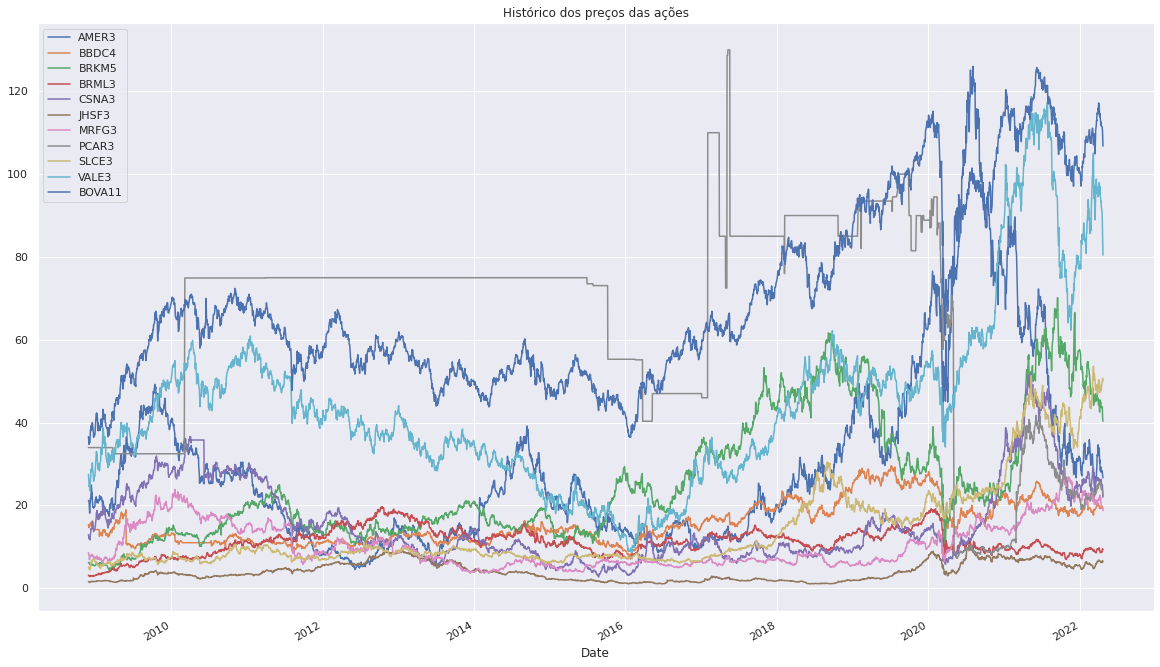

In [99]:
# plotando o grafico de linha
carteira_normalizada.plot(figsize=(20, 12), title='Histórico dos preços das ações')

Com o gráfico plotado, o que visualizamos é a flutuação do preço das ações das empresas, estando claro que as ações da Americanas S.A. e da Vale S.A. são as que possuem um maior valor.

Mas para um investidor, o mais interessante não é visualizar qual ação é a mais cara, e sim qual traz mais retorno. Para isso, fazemos uma normalização dos dados, dividindo cada um dos valores pelo valor inicial, e assim vemos o crescimento delas ao longo do tempo.

In [104]:
carteira_normalizada_retorno = carteira_normalizada.copy()

In [107]:
for acao in carteira_normalizada_retorno.columns:
    carteira_normalizada_retorno[acao] = carteira_normalizada_retorno[acao] / carteira_normalizada_retorno[acao][0]

<AxesSubplot:title={'center':'Histórico dos preços das ações'}, xlabel='Date'>

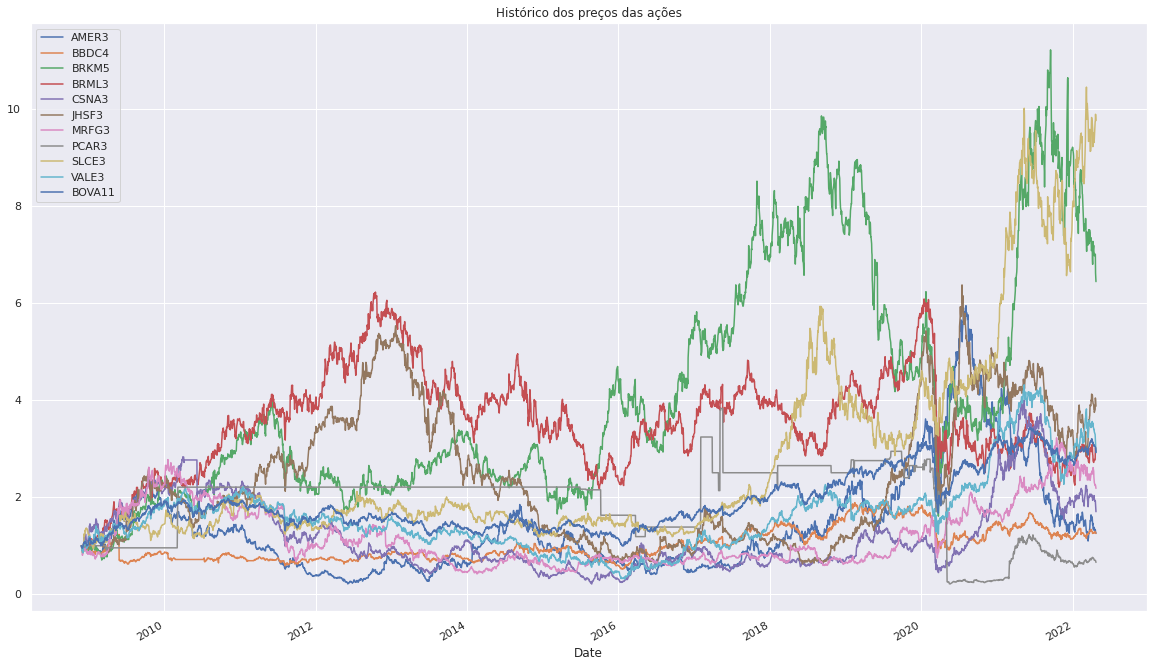

In [108]:
carteira_normalizada_retorno.plot(figsize=(20,12), title='Histórico dos preços das ações')

Se compararmos os dois gráficos antes e depois da normalização, chegaremos à conclusão de que as ações da Americanas S.A. e da Vale S.A. são as mais caras, mas as ações da Braskem S.A. e da SLC Agrícola S.A proporcionaram maior retorno para o investidor no período analisado.